In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer  
from sklearn.model_selection import train_test_split

In [428]:
# import dataset
df = pd.read_csv('car_data.csv')

In [429]:
# display first few rows of the dataset
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [430]:
# display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Univariate Analysis

### 1. Name Column

In [431]:
df['name'].nunique()

525

In [432]:
df['name'].value_counts()

name
Honda City                         13
Honda Amaze                        11
Maruti Suzuki Dzire                10
Mahindra Scorpio S10                9
Maruti Suzuki Alto 800 Lxi          9
                                   ..
Mahindra Bolero DI BSII             1
Audi Q3 2.0 TDI quattro Premium     1
Skoda Superb 1.8 TFSI AT            1
BMW 5 Series 520d Sedan             1
Chevrolet Sail 1.2 LT ABS           1
Name: count, Length: 525, dtype: int64

In [433]:
df['name'].isnull().sum()  

0

### Observation 1 : 
This column is generally clean, but the name values have a messy structure, so we will standardize them and extract only the first three words for consistency.

## 2. Company

In [434]:
df['company'].head(5)

0     Hyundai
1    Mahindra
2      Maruti
3     Hyundai
4        Ford
Name: company, dtype: object

In [435]:
df['company'].value_counts()

company
Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: count, dtype: int64

In [436]:
df.company.isnull().sum()  

0

## 3.Year Column

In [437]:
df['year'].head(5)  

0    2007
1    2006
2    2018
3    2014
4    2014
Name: year, dtype: object

In [438]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [439]:
df['year'].isnull().sum()   

0

## Observation 2
- The year column is very messy and contains many non-numeric entries.
- It is stored as an object, which is not suitable for a year field.
- We need to filter out only those values that are purely numeric.
- After extracting valid years, we will convert the column into integer format.

## 4. Price Column

In [440]:
df.Price.head(3)

0           80,000
1         4,25,000
2    Ask For Price
Name: Price, dtype: object

In [441]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [442]:
df['Price'].isnull().sum()

0

## Observation 3
- The Price column is also stored as an object instead of a numeric datatype.
- We need to extract only the numeric part of each value to clean this column.
- Any non-numeric entries, such as text or symbols, must be filtered out.
- Values like “ask for price” should be removed because they cannot be converted into integers.
- Commas within price values should be removed before converting them to integers.

## 5. Kms_Driven

In [443]:
df['kms_driven'].head(3)

0    45,000 kms
1        40 kms
2    22,000 kms
Name: kms_driven, dtype: object

In [444]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [445]:
df['kms_driven'].isnull().sum()

52

## Observation 4
- The kms_driven column contains values with commas that need to be removed.
- Each entry also includes the text “kms”, which should be separated from the numeric part.
- We will extract only the numeric portion and convert it into an integer.
- Any invalid or non-numeric entries must be filtered out during cleaning.
- Finally, missing values in this column will be handled appropriately.

## 5. Fuel Column

In [446]:
df['fuel_type'].head(3)  

0    Petrol
1    Diesel
2    Petrol
Name: fuel_type, dtype: object

In [447]:
df['fuel_type'].value_counts()

fuel_type
Petrol    440
Diesel    395
LPG         2
Name: count, dtype: int64

In [448]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [449]:
df['fuel_type'].isnull().sum()

55

## Data Cleaning

In [450]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')
df.head(3)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol


In [451]:
df = df[df['year'].astype(str).str.isnumeric()]

In [452]:
df['year'] = df['year'].astype(int)
df.head(2)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel


In [453]:
df = df[df['Price'] != 'Ask For Price']

In [454]:
df['Price'] = df['Price'].str.replace(',', '').astype(int)

In [455]:
df.head(2)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40 kms,Diesel


In [456]:
# Step 1: Remove commas and extract numeric part first
df['kms_driven'] = df['kms_driven'].str.split(' ').str[0].str.replace(',', '')

# Step 2: Keep only rows that are numeric
df = df[df['kms_driven'].str.isnumeric()]

# Step 3: Convert to integer
df['kms_driven'] = df['kms_driven'].astype(int)

In [457]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [458]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [470]:
df.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [ ]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

In [460]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [464]:
#  check for outliers in 'Price' column
df[df['Price']>=6000000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [469]:
#  check fourth quertile value
df['Price'].quantile(0.75)  

490000.0

In [471]:
#  remove outliers
df = df[df['Price']<6000000]

In [472]:
df.reset_index(drop=True, inplace=True)

In [473]:
df.to_csv('cleaned_car_data.csv')

In [476]:
X = df.drop('Price', axis=1)
y = df['Price']

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [478]:
categorical_cols = ['name', 'company', 'fuel_type']
numeric_cols = ['year', 'kms_driven']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [479]:
print(f'Mean Squared Error: {mse}') 
print(f'R^2 Score: {r2}')

Mean Squared Error: 86809526011.60913
R^2 Score: 0.5107414590000157


In [480]:
#  check predictions on few samples
for i in range(5):
    print(f'Actual Price: {y_test.iloc[i]}, Predicted Price: {y_pred[i]}')


    

Actual Price: 135000, Predicted Price: 115334.08510711789
Actual Price: 299999, Predicted Price: 279708.8976075053
Actual Price: 189000, Predicted Price: 215164.31241152436
Actual Price: 1400000, Predicted Price: 941335.0864169672
Actual Price: 215000, Predicted Price: 187562.12209655344


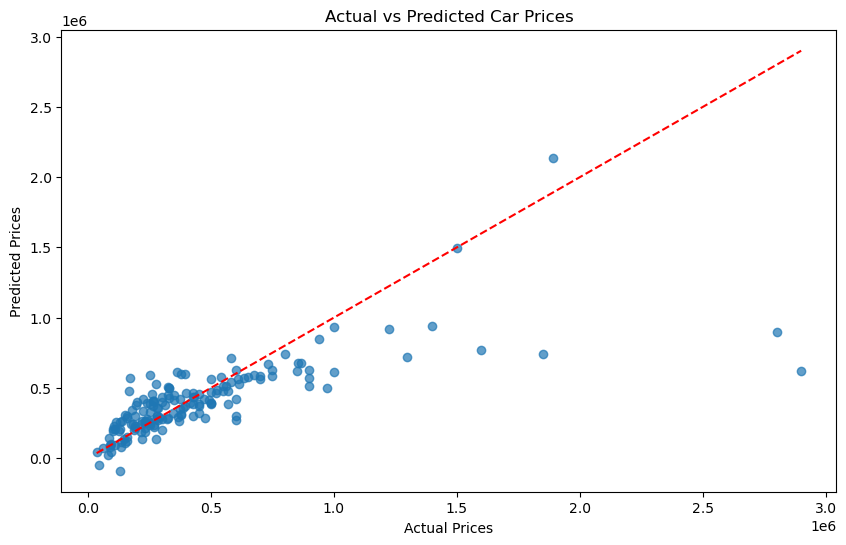

In [481]:
# plot actual vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()